In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans
import dofitPython_functions as LogFit 
from scipy.stats import normaltest
from scipy.stats import kruskal
from scipy.stats import shapiro

In [2]:
ECearth_ds = xr.open_dataset('/share/pech2273/ECEarthProcessed.nc')
NorESM_ds = xr.open_dataset('/share/pech2273/NorESMProcessed.nc')
ECMassFrac_ds = xr.open_dataset("/share/pech2273/ECMassFrac.nc")
NorMassFrac_ds = xr.open_dataset("/share/pech2273/NorMassFrac.nc")
ECMassFrac_ds = ECMassFrac_ds.reindex(time = ECearth_ds['time'])
ECMassFracGroups = ECMassFrac_ds.groupby(ECearth_ds['label'])
NorMassFracGroups = NorMassFrac_ds.groupby(NorESM_ds['label'])
ECearthGroups = ECearth_ds.groupby(ECearth_ds['label'])
NorGroups = NorESM_ds.groupby(NorESM_ds['label'])

In [3]:
def NormalityTest(data):
    stat, p = normaltest(data)
#    print(f"D'Agostino-Pearson Test: Statistic={stat:.4f}, p-value={p:.4f}")

    if p < 0.05:
        print("NO")
    else:
        print("Data is normally distributed.")
        print(f"D'Agostino-Pearson Test: Statistic={stat:.4f}, p-value={p:.4f}")

In [4]:
Namelist = ['BCMassFrac','OAMassFrac','SO4MassFrac','DustMassFrac','SeasaltMassFrac']
Namelist2 = ['BCMass','OAMass','SO4Mass','DustMass','SeasaltMass']

In [5]:

for i in range(0,len(ECMassFracGroups)):
    print(f'EC-Earth Cluster {i+1} has {len(ECMassFracGroups[i][Namelist[0]].isel(lev = 0))} entries')
for i in range(0,len(NorMassFracGroups)):
    print(f'NorESM Cluster {i+1} has {len(NorMassFracGroups[i][Namelist[0]].isel(lev = 0))} entries')
        

EC-Earth Cluster 1 has 2009 entries
EC-Earth Cluster 2 has 18101 entries
EC-Earth Cluster 3 has 21794 entries
EC-Earth Cluster 4 has 10766 entries
EC-Earth Cluster 5 has 6016 entries
EC-Earth Cluster 6 has 1217 entries
NorESM Cluster 1 has 1319 entries
NorESM Cluster 2 has 2396 entries
NorESM Cluster 3 has 266 entries
NorESM Cluster 4 has 4780 entries


In [6]:
for i in range(0,len(ECMassFracGroups)):
    print(f'EC-Earth Cluster {i+1} has {len(ECearthGroups[i]['T'].isel(lev = 0).dropna('time'))} entries')

EC-Earth Cluster 1 has 2009 entries
EC-Earth Cluster 2 has 18101 entries
EC-Earth Cluster 3 has 21794 entries
EC-Earth Cluster 4 has 10763 entries
EC-Earth Cluster 5 has 6016 entries
EC-Earth Cluster 6 has 1217 entries


In [7]:
for Name in Namelist:
    for i in range(0,len(ECMassFracGroups)):
        print(f'{Name} Cluster {i+1}')
        NormalityTest(ECMassFracGroups[i][Name].isel(lev = 0))

BCMassFrac Cluster 1
NO
BCMassFrac Cluster 2
NO
BCMassFrac Cluster 3
NO
BCMassFrac Cluster 4
NO
BCMassFrac Cluster 5
NO
BCMassFrac Cluster 6
NO
OAMassFrac Cluster 1
NO
OAMassFrac Cluster 2
NO
OAMassFrac Cluster 3
NO
OAMassFrac Cluster 4
NO
OAMassFrac Cluster 5
NO
OAMassFrac Cluster 6
NO
SO4MassFrac Cluster 1
NO
SO4MassFrac Cluster 2
NO
SO4MassFrac Cluster 3
NO
SO4MassFrac Cluster 4
NO
SO4MassFrac Cluster 5
NO
SO4MassFrac Cluster 6
NO
DustMassFrac Cluster 1
NO
DustMassFrac Cluster 2
NO
DustMassFrac Cluster 3
NO
DustMassFrac Cluster 4
NO
DustMassFrac Cluster 5
NO
DustMassFrac Cluster 6
NO
SeasaltMassFrac Cluster 1
NO
SeasaltMassFrac Cluster 2
NO
SeasaltMassFrac Cluster 3
NO
SeasaltMassFrac Cluster 4
NO
SeasaltMassFrac Cluster 5
NO
SeasaltMassFrac Cluster 6
NO


In [8]:
for i in range(0,len(ECMassFracGroups)):
     print(f'Temp Cluster {i+1}')
     NormalityTest(ECearthGroups[i]['T'].isel(lev = 0).dropna('time'))

Temp Cluster 1
NO
Temp Cluster 2
NO
Temp Cluster 3
NO
Temp Cluster 4
NO
Temp Cluster 5
NO
Temp Cluster 6
Data is normally distributed.
D'Agostino-Pearson Test: Statistic=4.0269, p-value=0.1335


In [9]:
for i in range(0,len(ECMassFracGroups)):
     print(f'Temp Cluster {i+1}')
     NormalityTest(ECearthGroups[i]['TotN70'].isel(lev = 0).dropna('time'))

Temp Cluster 1
NO
Temp Cluster 2
NO
Temp Cluster 3
NO
Temp Cluster 4
NO
Temp Cluster 5
NO
Temp Cluster 6
NO


In [10]:
for Name in Namelist2:
    for i in range(0,len(ECMassFracGroups)):
        print(f'{Name} Cluster {i+1}')
        NormalityTest(np.log10(ECMassFracGroups[i][Name].isel(lev = 0)))

BCMass Cluster 1
NO
BCMass Cluster 2
NO
BCMass Cluster 3
NO
BCMass Cluster 4
NO
BCMass Cluster 5
NO
BCMass Cluster 6
NO
OAMass Cluster 1
NO
OAMass Cluster 2
NO
OAMass Cluster 3
NO
OAMass Cluster 4
NO
OAMass Cluster 5
NO
OAMass Cluster 6
NO
SO4Mass Cluster 1
NO
SO4Mass Cluster 2
NO
SO4Mass Cluster 3
NO
SO4Mass Cluster 4
NO
SO4Mass Cluster 5
NO
SO4Mass Cluster 6
NO
DustMass Cluster 1
NO
DustMass Cluster 2
NO
DustMass Cluster 3
NO
DustMass Cluster 4
NO
DustMass Cluster 5
NO
DustMass Cluster 6
Data is normally distributed.
D'Agostino-Pearson Test: Statistic=3.0665, p-value=0.2158
SeasaltMass Cluster 1
NO
SeasaltMass Cluster 2
NO
SeasaltMass Cluster 3
NO
SeasaltMass Cluster 4
NO
SeasaltMass Cluster 5
NO
SeasaltMass Cluster 6
NO


In [11]:
for i in range(0,len(NorGroups)):
    print(f'Temp Cluster {i+1}')
    stat, p = shapiro(NorGroups[i]['T'].isel(lev = -1))
        
    if p < 0.05:
        print("NO")
    else:
        print("Data is normally distributed.")
        print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

Temp Cluster 1
NO
Temp Cluster 2
NO
Temp Cluster 3
NO
Temp Cluster 4
NO


In [12]:
for i in range(0,len(NorGroups)):
    print(f'N70 Cluster {i+1}')
    stat, p = shapiro(NorGroups[i]['TotN70'].isel(lev = -1))
        
    if p < 0.05:
        print("NO")
    else:
        print("Data is normally distributed.")
        print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

N70 Cluster 1
NO
N70 Cluster 2
NO
N70 Cluster 3
NO
N70 Cluster 4
NO


In [13]:
for Name in Namelist:
    for i in range(0,len(NorMassFracGroups)):
        print(f'{Name} Cluster {i+1}')
        stat, p = shapiro(NorMassFracGroups[i][Name].isel(lev = -1))
        
        if p < 0.05:
            print("NO")
        else:
            print("Data is normally distributed.")
            print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

BCMassFrac Cluster 1
NO
BCMassFrac Cluster 2
NO
BCMassFrac Cluster 3
NO
BCMassFrac Cluster 4
NO
OAMassFrac Cluster 1
NO
OAMassFrac Cluster 2
NO
OAMassFrac Cluster 3
NO
OAMassFrac Cluster 4
NO
SO4MassFrac Cluster 1
NO
SO4MassFrac Cluster 2
NO
SO4MassFrac Cluster 3
NO
SO4MassFrac Cluster 4
NO
DustMassFrac Cluster 1
NO
DustMassFrac Cluster 2
NO
DustMassFrac Cluster 3
NO
DustMassFrac Cluster 4
NO
SeasaltMassFrac Cluster 1
NO
SeasaltMassFrac Cluster 2
NO
SeasaltMassFrac Cluster 3
NO
SeasaltMassFrac Cluster 4
NO


In [14]:
for Name in Namelist2:
    for i in range(0,len(NorMassFracGroups)):
        print(f'{Name} Cluster {i+1}')
        stat, p = shapiro(np.log10(NorMassFracGroups[i][Name].isel(lev = -1)))
        
        if p < 0.05:
            print("NO")
        else:
            print("Data is normally distributed.")
            print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

BCMass Cluster 1
NO
BCMass Cluster 2
NO
BCMass Cluster 3
NO
BCMass Cluster 4
NO
OAMass Cluster 1
NO
OAMass Cluster 2
NO
OAMass Cluster 3
NO
OAMass Cluster 4
NO
SO4Mass Cluster 1
NO
SO4Mass Cluster 2
NO
SO4Mass Cluster 3
NO
SO4Mass Cluster 4
NO
DustMass Cluster 1
NO
DustMass Cluster 2
NO
DustMass Cluster 3
NO
DustMass Cluster 4
NO
SeasaltMass Cluster 1
Data is normally distributed.
Shapiro-Wilk Test: Statistic=0.9979, p-value=0.0915
SeasaltMass Cluster 2
NO
SeasaltMass Cluster 3
NO
SeasaltMass Cluster 4
NO


In [15]:
Group1 = ECearthGroups[0]['T'].isel(lev = 0).dropna('time')
Group2 = ECearthGroups[1]['T'].isel(lev = 0).dropna('time')
Group3 = ECearthGroups[2]['T'].isel(lev = 0).dropna('time')
Group4 = ECearthGroups[3]['T'].isel(lev = 0).dropna('time')
Group5 = ECearthGroups[4]['T'].isel(lev = 0).dropna('time')
Group6 = ECearthGroups[5]['T'].isel(lev = 0).dropna('time')

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(Group1, Group2, Group3,Group4, Group5, Group6)

print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 12146.826433588498, P-value: 0.0


In [16]:
Group1 = ECearthGroups[0]['TotN70'].isel(lev = 0).dropna('time')
Group2 = ECearthGroups[1]['TotN70'].isel(lev = 0).dropna('time')
Group3 = ECearthGroups[2]['TotN70'].isel(lev = 0).dropna('time')
Group4 = ECearthGroups[3]['TotN70'].isel(lev = 0).dropna('time')
Group5 = ECearthGroups[4]['TotN70'].isel(lev = 0).dropna('time')
Group6 = ECearthGroups[5]['TotN70'].isel(lev = 0).dropna('time')

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(Group1, Group2, Group3,Group4, Group5, Group6)

print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 51552.74524121752, P-value: 0.0


In [17]:
for Name in Namelist:
    Group1 = ECMassFracGroups[0][Name].isel(lev = 0)
    Group2 = ECMassFracGroups[1][Name].isel(lev = 0)
    Group3 = ECMassFracGroups[2][Name].isel(lev = 0)
    Group4 = ECMassFracGroups[3][Name].isel(lev = 0)
    Group5 = ECMassFracGroups[4][Name].isel(lev = 0)
    Group6 = ECMassFracGroups[5][Name].isel(lev = 0)

# Perform Kruskal-Wallis test
    h_stat, p_value = kruskal(Group1, Group2, Group3,Group4, Group5, Group6)

    print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 17169.54368434462, P-value: 0.0
H-statistic: 14973.349885431155, P-value: 0.0
H-statistic: 7377.799338813552, P-value: 0.0
H-statistic: 1203.4575418482243, P-value: 5.236755743529103e-258
H-statistic: 8229.59072807711, P-value: 0.0


In [18]:
for Name in Namelist2:
    Group1 = np.log10(ECMassFracGroups[0][Name].isel(lev = 0))
    Group2 = np.log10(ECMassFracGroups[1][Name].isel(lev = 0))
    Group3 = np.log10(ECMassFracGroups[2][Name].isel(lev = 0))
    Group4 = np.log10(ECMassFracGroups[3][Name].isel(lev = 0))
    Group5 = np.log10(ECMassFracGroups[4][Name].isel(lev = 0))
    Group6 = np.log10(ECMassFracGroups[5][Name].isel(lev = 0))

# Perform Kruskal-Wallis test
    h_stat, p_value = kruskal(Group1, Group2, Group3,Group4, Group5, Group6)

    print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 50808.8933261886, P-value: 0.0
H-statistic: 40367.21564726068, P-value: 0.0
H-statistic: 2388.944967961756, P-value: 0.0
H-statistic: 5002.503680102533, P-value: 0.0
H-statistic: 328.2729988960808, P-value: 8.309184121917683e-69


In [19]:

Group1 = NorGroups[0]['T'].isel(lev = -1)
Group2 = NorGroups[1]['T'].isel(lev = -1)
Group3 = NorGroups[2]['T'].isel(lev = -1)
Group4 = NorGroups[3]['T'].isel(lev = -1)
h_stat, p_value = kruskal(Group1, Group2, Group3,Group4)
print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 4487.7070754863735, P-value: 0.0


In [20]:

Group1 = NorGroups[0]['TotN70'].isel(lev = -1)
Group2 = NorGroups[1]['TotN70'].isel(lev = -1)
Group3 = NorGroups[2]['TotN70'].isel(lev = -1)
Group4 = NorGroups[3]['TotN70'].isel(lev = -1)
h_stat, p_value = kruskal(Group1, Group2, Group3,Group4)
print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 6459.944982016776, P-value: 0.0


In [21]:
for Name in Namelist:
    Group1 = NorMassFracGroups[0][Name].isel(lev = -1)
    Group2 = NorMassFracGroups[1][Name].isel(lev = -1)
    Group3 = NorMassFracGroups[2][Name].isel(lev = -1)
    Group4 = NorMassFracGroups[3][Name].isel(lev = -1)
    
    

# Perform Kruskal-Wallis test
    h_stat, p_value = kruskal(Group1, Group2, Group3,Group4)

    print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 937.8737066013437, P-value: 5.392458565002463e-203
H-statistic: 1424.626335375004, P-value: 1.33480234091337e-308
H-statistic: 176.1364097112418, P-value: 6.022464385887513e-38
H-statistic: 1312.1276820811368, P-value: 3.4383713359881606e-284
H-statistic: 1621.3873228777022, P-value: 0.0


In [22]:
for Name in Namelist:
    Group1 = np.log10(NorMassFracGroups[0][Name].isel(lev = -1))
    Group2 = np.log10(NorMassFracGroups[1][Name].isel(lev = -1))
    Group3 = np.log10(NorMassFracGroups[2][Name].isel(lev = -1))
    Group4 = np.log10(NorMassFracGroups[3][Name].isel(lev = -1))
    
    

# Perform Kruskal-Wallis test
    h_stat, p_value = kruskal(Group1, Group2, Group3,Group4)

    print(f"H-statistic: {h_stat}, P-value: {p_value}")

H-statistic: 937.8735781828753, P-value: 5.392804453332875e-203
H-statistic: 1424.626335375004, P-value: 1.33480234091337e-308
H-statistic: 176.13614869739826, P-value: 6.023245997415694e-38
H-statistic: 1312.127682104552, P-value: 3.438371295763987e-284
H-statistic: 1621.387322921103, P-value: 0.0


MAKE HISTOGRAMS 
QQ PLOTS 

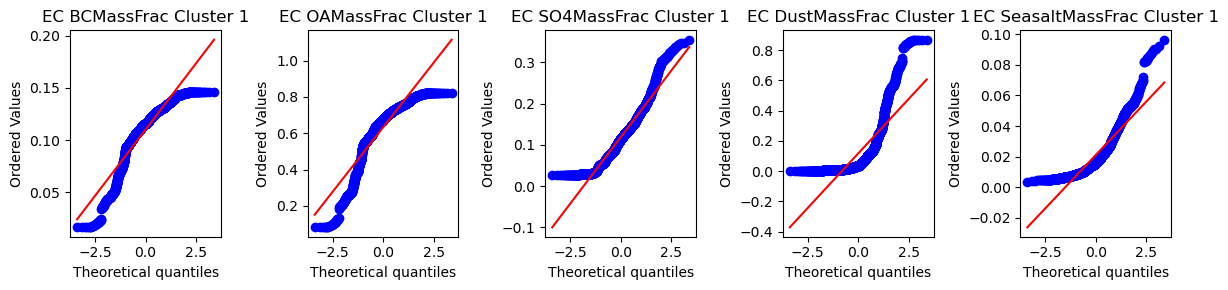

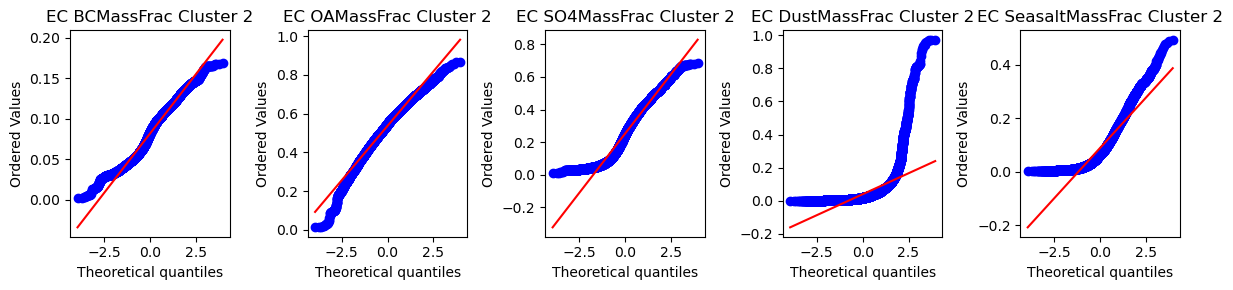

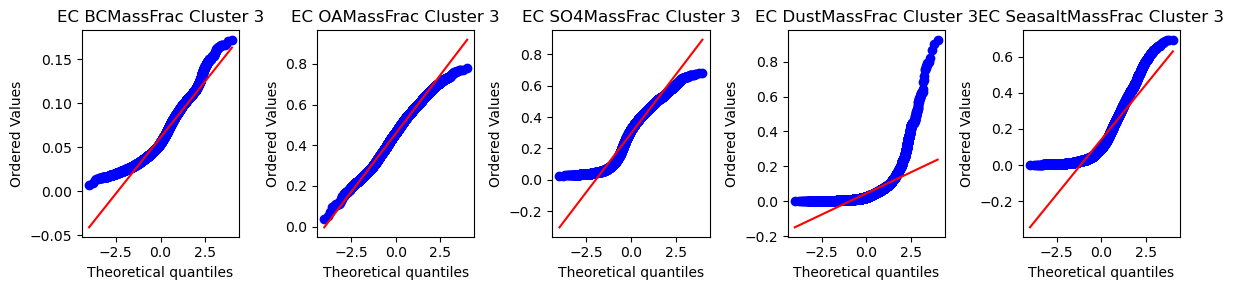

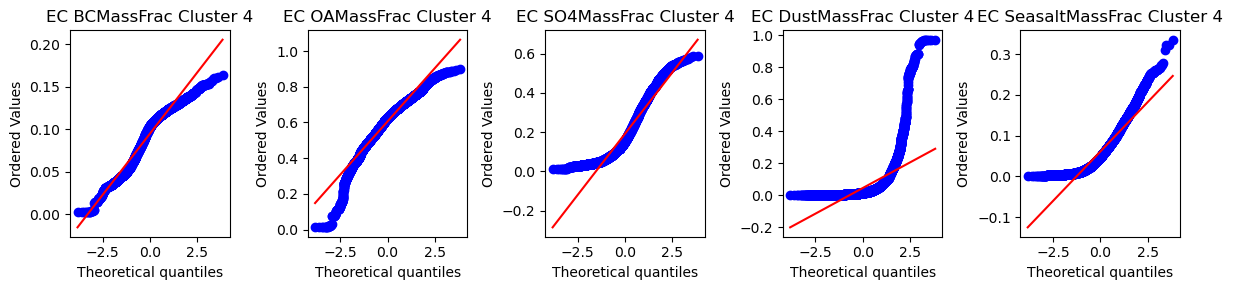

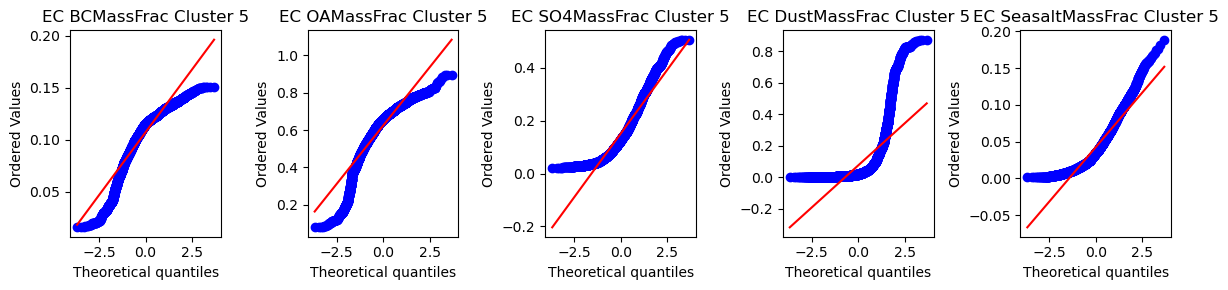

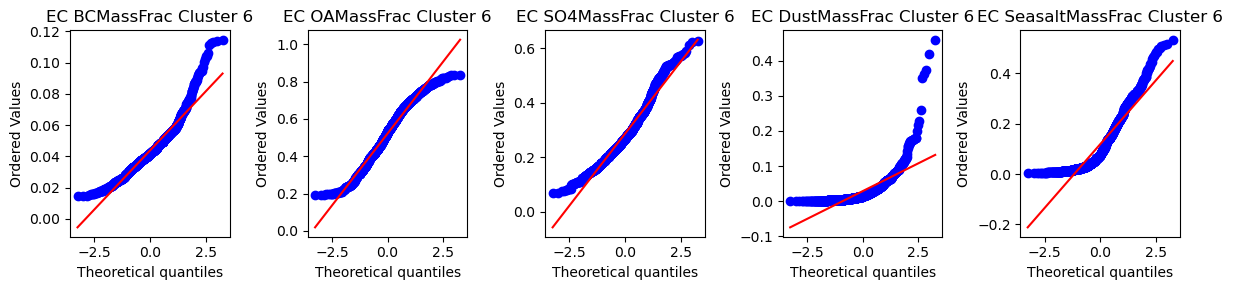

In [43]:
for i in range(6):
    selected_data =ECMassFracGroups[i][Namelist].isel(lev=0) 
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    axes = axes.flatten()
    for ax, (name, data) in zip(axes, selected_data.items()):
        stats.probplot(data.values, dist="norm", plot=ax)
        ax.set_title(f"EC {name} Cluster {i +1}")
    plt.tight_layout()
    plt.show()

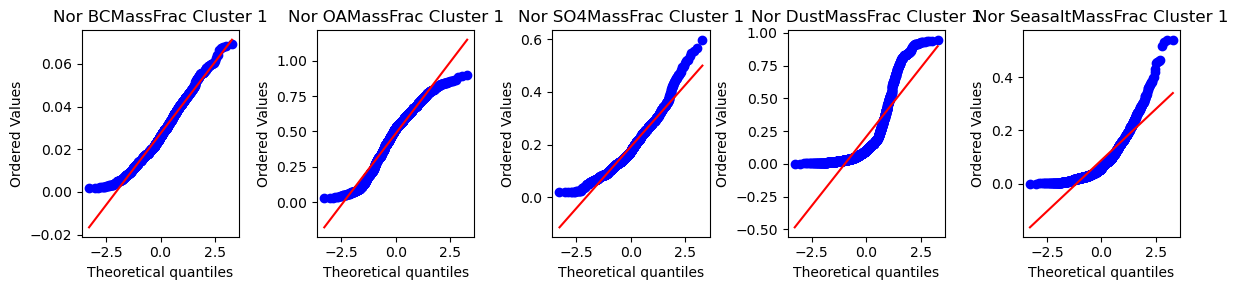

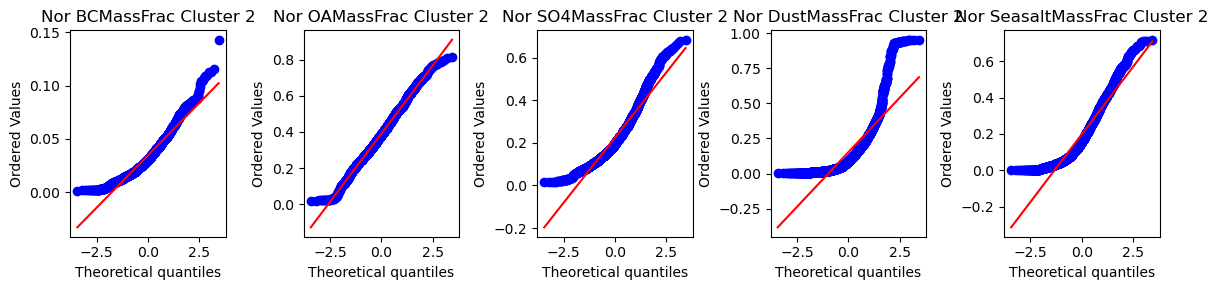

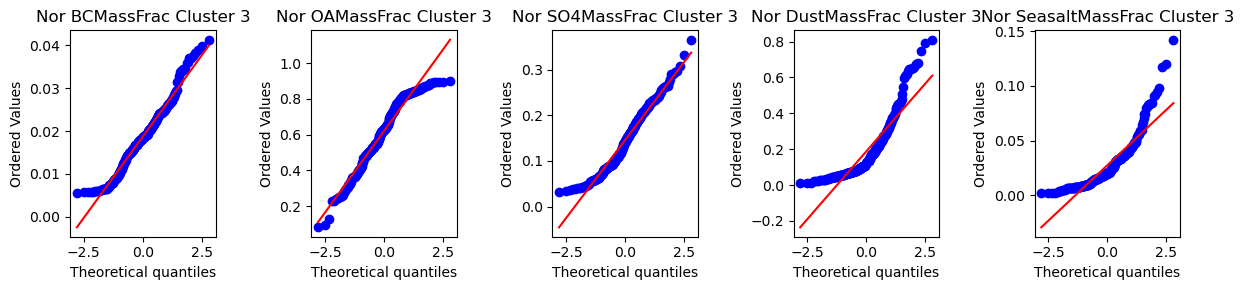

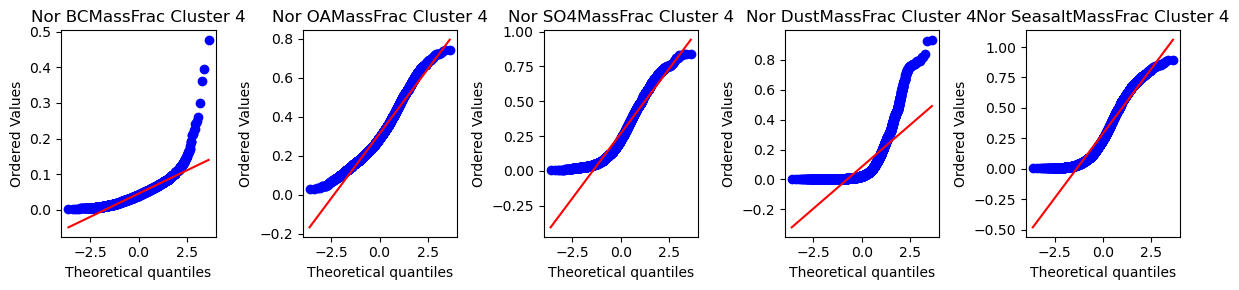

In [44]:
for i in range(4):
    selected_data =NorMassFracGroups[i][Namelist].isel(lev=-1) 
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    axes = axes.flatten()
    for ax, (name, data) in zip(axes, selected_data.items()):
        stats.probplot(data.values, dist="norm", plot=ax)
        ax.set_title(f"Nor {name} Cluster {i +1}")
    plt.tight_layout()
    plt.show()

In [194]:
from scipy.stats import bootstrap
# Initialize lists to store results
def bootstraptable(VarName, Dataset, Nor = True):
    if Nor == True:
        ClusterNumber = 4
        level = -1
        DataName = 'Nor'
    else:
        ClusterNumber = 6
        level = 0
        DataName = 'EC'
    means = []
    ci_low = []
    ci_high = []
    bootstraparray = []

    for i in range(ClusterNumber):    
        data_tuple = (Dataset[i][VarName].isel(lev=level).dropna('time'),)
        boot_result = bootstrap(data_tuple, np.mean, confidence_level=0.95, n_resamples=1000)
        means.append(boot_result.bootstrap_distribution.mean())  
        ci_low.append(boot_result.confidence_interval.low)  
        ci_high.append(boot_result.confidence_interval.high) 
        bootstraparray.append(boot_result.bootstrap_distribution)
    DataFrame = pd.DataFrame({
        "Cluster": [f"Cluster {i+1}" for i in range(ClusterNumber)],f"{DataName}, {VarName} Mean": means,"CI_Low": ci_low,"CI_High": ci_high})

    return DataFrame, bootstraparray

In [195]:
Test = bootstraptable('T',ECearthGroups,Nor = False)

In [ ]:
ECMassFracListDF = []
for Name in Namelist:
    ECMassFracListDF.append(bootstraptable(Name, ECMassFracGroups, Nor = False))

In [ ]:
NorMassFracListDF = []
for Name in Namelist:
    NorMassFracListDF.append(bootstraptable(Name, NorMassFracGroups, Nor = True))

In [ ]:
def whiskerplot(DataFrame):
    y_err = np.array([DataFrame.iloc[:,1] - DataFrame.iloc[:,2], DataFrame.iloc[:,3] - DataFrame.iloc[:,1]])
    plt.figure(figsize=(6, 4))
    plt.errorbar(DataFrame.iloc[:,0], DataFrame.iloc[:,1], yerr=y_err, fmt='o', capsize=5, markersize=8, color='black', elinewidth=1.5, capthick=1.5) 
    plt.xticks(DataFrame.iloc[:,0], labels=[f" {i}" for i in DataFrame.iloc[:,0]])
    plt.xlabel("Clusters")
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

In [ ]:
for i in range(len(NorMassFracListDF[0])):
    whiskerplot(NorMassFracListDF[i])

In [ ]:
for i in range(len(ECMassFracListDF[0])):
    whiskerplot(ECMassFracListDF[i])

In [ ]:

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.flatten()
for ax, i in zip (axes, range(4)):
    stats.probplot(NorGroups[i]['T'].isel(lev=-1), dist="norm", plot=ax)
    ax.set_title(f"Nor Temp Cluster {i +1}")
plt.tight_layout()
plt.show()

In [ ]:

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.flatten()
for ax, i in zip (axes, range(4)):
    stats.probplot(NorGroups[i]['TotN70'].isel(lev=-1), dist="norm", plot=ax)
    ax.set_title(f"Nor CCN Cluster {i +1}")
plt.tight_layout()
plt.show()

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
for ax, i in zip (axes, range(6)):
    stats.probplot(ECearthGroups[i]['TotN70'].isel(lev=0), dist="norm", plot=ax)
    ax.set_title(f"EC CCN Cluster {i +1}")
plt.tight_layout()
plt.show()

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
for ax, i in zip (axes, range(6)):
    stats.probplot(ECearthGroups[i]['T'].isel(lev=0), dist="norm", plot=ax)
    ax.set_title(f"EC Temp Cluster {i +1}")
plt.tight_layout()
plt.show()

In [ ]:
NorTempBSdf = bootstraptable('T', NorGroups, Nor = True)
NorCCNBSdf = bootstraptable('TotN70', NorGroups, Nor = True)
ECTempBSdf = bootstraptable('T', ECearthGroups, Nor = False)
ECCCNBSdf = bootstraptable('TotN70', ECearthGroups, Nor = False)

In [ ]:
whiskerplot(NorTempBSdf)

In [ ]:
whiskerplot(NorCCNBSdf)

In [ ]:
whiskerplot(ECTempBSdf)

In [ ]:
whiskerplot(ECCCNBSdf)